<H1><b>GROUP 96: SPACESHIP TITANIC

<h3>Project by: Aryan Kheskani, Aryan Rajput, Gaelle Nehme, Gonzalo Lantero, Lama Abboud


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [17]:
missing_values = train_data.isnull().sum() / len(train_data) * 100
missing_values 

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

<h1>How does applying Principal Component Analysis (PCA) to the dataset affect model performance, and what is the trade-off between the number of principal components retained and the model’s predictive accuracy?


In [ ]:
train_data.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handle missing values - Fill numerical columns with median, categorical with mode
# for col in train_data.columns:
#     if train_data[col].dtype == 'object':  # Categorical columns
#         train_data[col].fillna(train_data[col].mode()[0], inplace=True)
#     else:  # Numerical columns
#         train_data[col].fillna(train_data[col].median(), inplace=True)

# # Print dataset after missing value handling
# print("\nDataset after handling missing values:")
# print(train_data.head())

# Encode categorical variables
encoder = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = encoder.fit_transform(train_data[col])

# Define features (X) and target (y)
X = train_data.drop(columns=['Transported'])  # Features
y = train_data['Transported'].astype(int)  # Target (1 = Transported, 0 = Not Transported)

# Print dataset after encoding
print("\nDataset after encoding categorical variables:")
print(X.head())



Dataset after encoding categorical variables:
   HomePlanet  CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0           1      False            2  39.0  False          0.0        0.0   
1           0      False            2  24.0  False        109.0        9.0   
2           1      False            2  58.0   True         43.0     3576.0   
3           1      False            2  33.0  False          0.0     1283.0   
4           0      False            2  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  
0           0.0     0.0     0.0  
1          25.0   549.0    44.0  
2           0.0  6715.0    49.0  
3         371.0  3329.0   193.0  
4         151.0   565.0     2.0  

Shape of training data: (6954, 10)
Shape of test data: (1739, 10)


In [ ]:
# Split dataset into train & test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features for PCA
scaler = StandardScaler() # the scalar object is used to scale the data so that the data has mean = 0 and variance = 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print shape of training and test sets
print("\nShape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)


Shape of training data: (6954, 10)
Shape of test data: (1739, 10)


In [23]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Explained Variance Ratio:
[0.18117465 0.3140219  0.42983511 0.52532941 0.61908589 0.71101522
 0.79440275 0.87618668 0.95200604 1.        ]


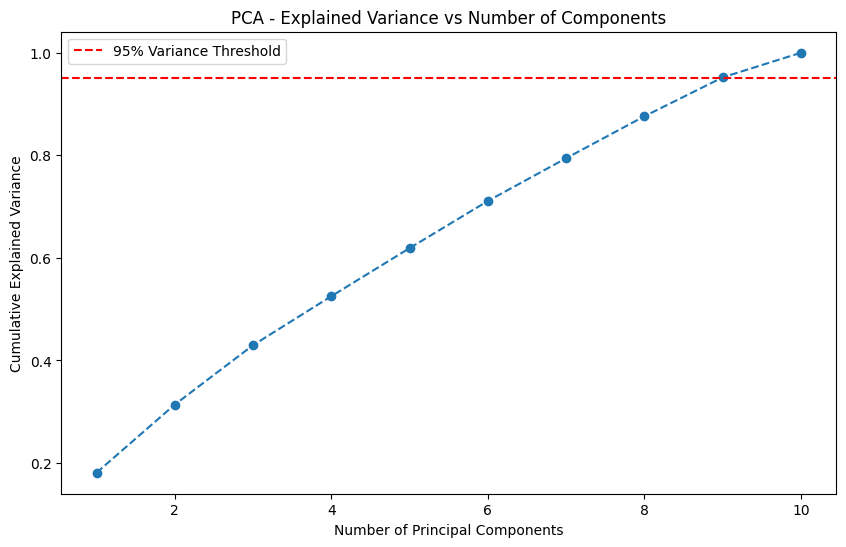

In [24]:
# Plot cumulative explained variance to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs Number of Components")
plt.legend()
plt.show()


In [25]:
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"\nOptimal number of components to retain 95% variance: {n_components}")


Optimal number of components to retain 95% variance: 9


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

# Apply PCA with optimal components
pca_optimal = PCA(n_components=n_components)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)

# Train a Random Forest Classifier before and after PCA
rf_before = RandomForestClassifier(n_estimators=100, random_state=42)
rf_before.fit(X_train, y_train)

rf_after = RandomForestClassifier(n_estimators=100, random_state=42)
rf_after.fit(X_train_pca_optimal, y_train)

# Predictions
y_pred_before = rf_before.predict(X_test)
y_pred_after = rf_after.predict(X_test_pca_optimal)

# Evaluate model performance
metrics = {
    "Accuracy": [accuracy_score(y_test, y_pred_before), accuracy_score(y_test, y_pred_after)],
    "ROC AUC": [roc_auc_score(y_test, y_pred_before), roc_auc_score(y_test, y_pred_after)],
    "F1 Score": [f1_score(y_test, y_pred_before), f1_score(y_test, y_pred_after)]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, index=["Before PCA", "After PCA"])

# Print performance metrics
print("\nModel Performance Comparison:")
print(metrics_df)


Model Performance Comparison:
            Accuracy   ROC AUC  F1 Score
Before PCA  0.780909  0.780969  0.780403
After PCA   0.776308  0.776334  0.776822
